<a href="https://colab.research.google.com/github/Anirudhsahu/Flight_Delay_Prediction/blob/main/Flight_Delay_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/airlines-dataset-to-predict-a-delay/Airlines.csv


**<font size=5>DATA</font>**

**<font size=4>Functions</font>**

In [ ]:
def get_stats(x):
    frame_dict = {'Column':[], 'Non-null counts':[], 'Null values':[], 'Number of unique':[], 'Unique values':[], 'Data type':[]}
    for col in x.columns:
        frame_dict['Column'].append(col)
        frame_dict['Non-null counts'].append(x[col].count())
        frame_dict['Null values'].append(x[col].isnull().sum())
        frame_dict['Number of unique'].append(x[col].nunique())

        un_col = x[col].unique()

        if(len(un_col) > 4):
            frame_dict['Unique values'].append(np.append(un_col[:4], '...'))
        else:
            frame_dict['Unique values'].append(un_col)

        frame_dict['Data type'].append(x[col].dtype)

    return pd.DataFrame(frame_dict)

In [ ]:
data_dir = '/kaggle/input/airlines-dataset-to-predict-a-delay/'
df = pd.read_csv(data_dir+'Airlines.csv')

get_stats(df)

,Column,Non-null counts,Null values,Number of unique,Unique values,Data type
0,id,539383,0,539383,"[1, 2, 3, 4, ...]",int64
1,Airline,539383,0,18,"[CO, US, AA, AS, ...]",object
2,Flight,539383,0,6585,"[269, 1558, 2400, 2466, ...]",int64
3,AirportFrom,539383,0,293,"[SFO, PHX, LAX, ANC, ...]",object
4,AirportTo,539383,0,293,"[IAH, CLT, DFW, SEA, ...]",object
5,DayOfWeek,539383,0,7,"[3, 4, 5, 6, ...]",int64
6,Time,539383,0,1131,"[15, 20, 30, 35, ...]",int64
7,Length,539383,0,426,"[205, 222, 165, 195, ...]",int64
8,Delay,539383,0,2,"[1, 0]",int64


In [ ]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,539383.0,269692.000000,155706.604461,1.0,134846.5,269692.0,404537.5,539383.0
Flight,539383.0,2427.928630,2067.429837,1.0,712.0,1809.0,3745.0,7814.0
DayOfWeek,539383.0,3.929668,1.914664,1.0,2.0,4.0,5.0,7.0
Time,539383.0,802.728963,278.045911,10.0,565.0,795.0,1035.0,1439.0
Length,539383.0,132.202007,70.117016,0.0,81.0,115.0,162.0,655.0
Delay,539383.0,0.445442,0.497015,0.0,0.0,0.0,1.0,1.0


**<font size=4>Finding Duplicates</font>**
* No duplicates found

In [ ]:
print(f'Original dataset size: {df.shape}')
print(f'Dataset with no duplicates: {df[~df.duplicated()].shape}')

Original dataset size: (539383, 9)
Dataset with no duplicates: (539383, 9)


**<font size=5>DATA ANALYSIS</font>**

**<font size=4>Functions</font>**

In [ ]:
def percentage_of_relations(y, x='Delay', dataframe=df, bins=None, s=1, axis=0):
    cop_df = dataframe.copy()
    if bins != None:
        cop_df[y]=pd.cut(cop_df[y], bins=bins)

    crosstab = pd.crosstab(dataframe[x], columns = cop_df[y])
    return round(crosstab.div(crosstab.sum(s), axis = axis)*100, 1)

**<font size=4>PairPlotting</font>**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


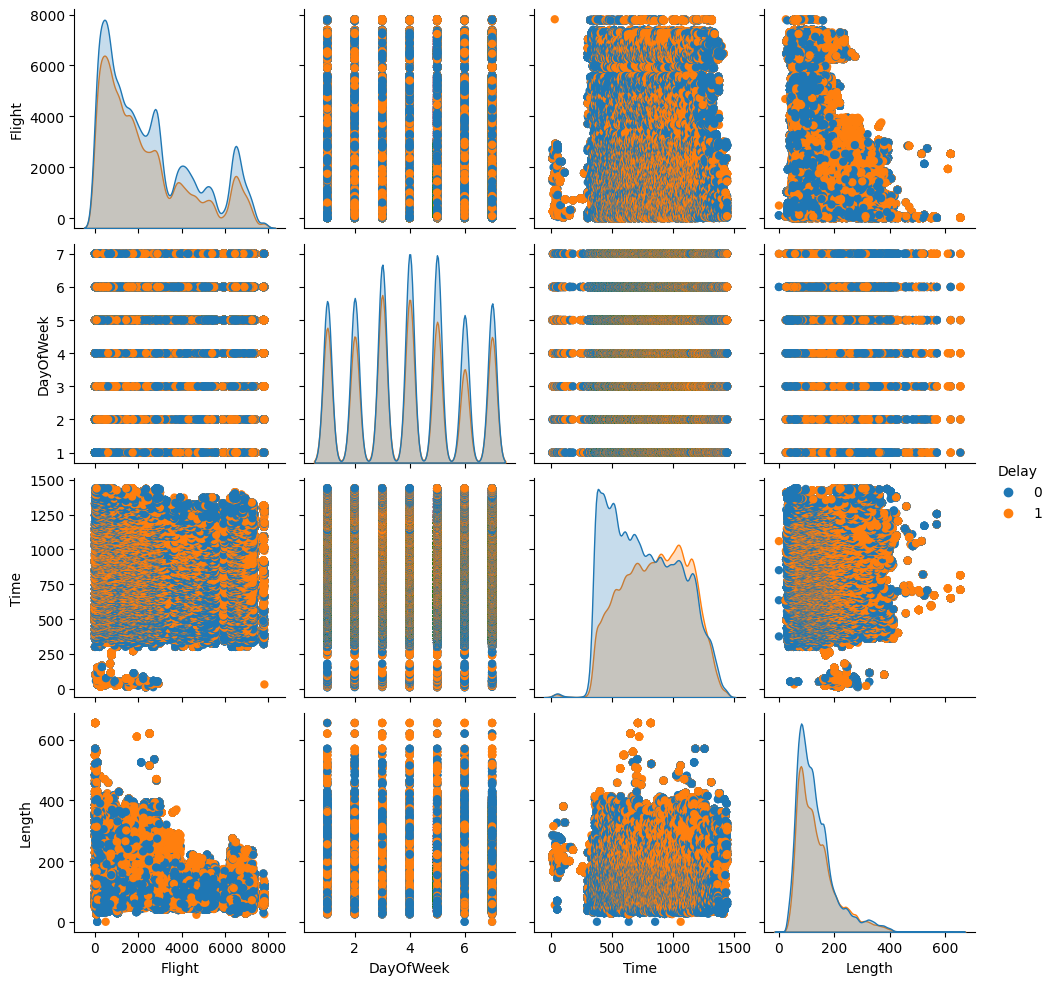

In [ ]:
sns.pairplot(df.drop('id',axis=1), hue='Delay', plot_kws=dict(edgecolor="none"))

**<font size=4>Delay</font>**

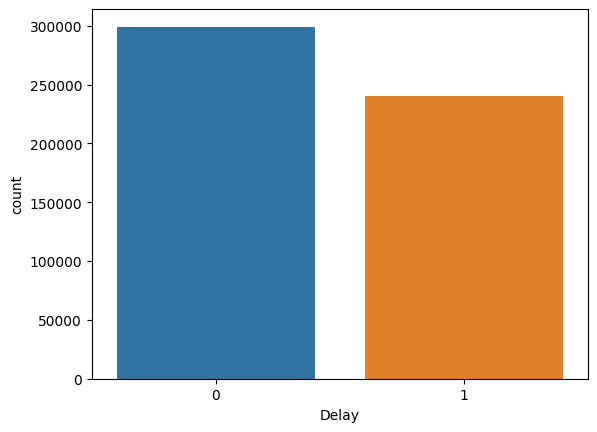

Delay
0    0.554558
1    0.445442
Name: proportion, dtype: float64

In [ ]:
sns.countplot(x='Delay',data=df)
plt.show()
df['Delay'].value_counts(normalize=True)

**<font size=4>Airline-Delay</font>**
* SouthWest Airlines have the highest population in the dataset
* Airline deemed to be delayed the most was SouthWest Airlines(IATA Code WN)
* Continental(CO) and Southwest(WN) airlines have a higher chance of being delayed

<Axes: xlabel='Delay', ylabel='count'>

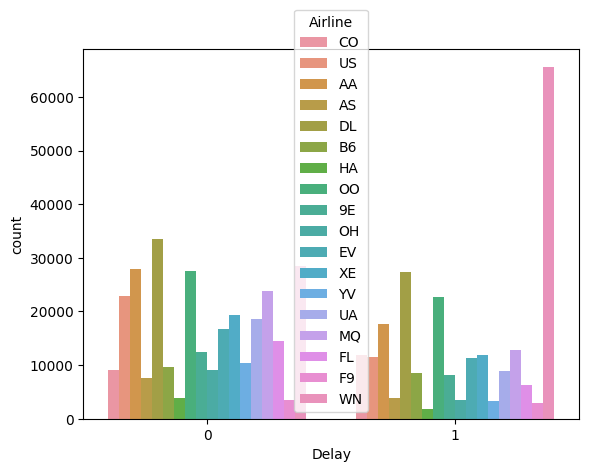

In [ ]:
sns.countplot(x='Delay', hue='Airline', data=df)

* **Percentages of each airline that consists in being delayed**

In [ ]:
percentage_of_relations(y='Airline')

Airline,9E,AA,AS,B6,CO,DL,EV,F9,FL,HA,MQ,OH,OO,UA,US,WN,XE,YV
Delay,,,,,,,,,,,,,,,,,,
0,4.2,9.3,2.5,3.2,3.1,11.2,5.6,1.2,4.9,1.3,8.0,3.1,9.2,6.2,7.7,9.5,6.5,3.5
1,3.4,7.4,1.6,3.5,5.0,11.4,4.7,1.2,2.6,0.7,5.3,1.5,9.5,3.7,4.8,27.3,4.9,1.4


<Axes: xlabel='Airline', ylabel='count'>

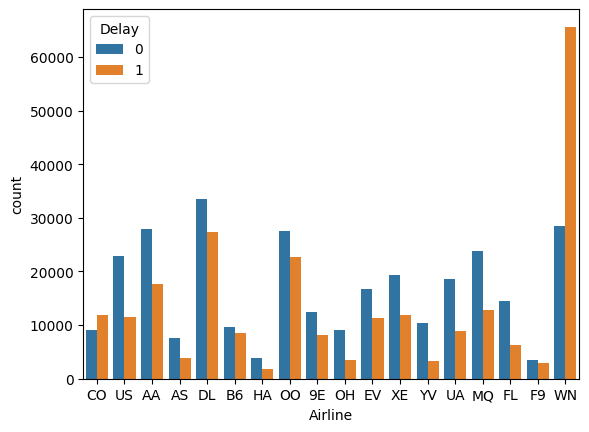

In [ ]:
sns.countplot(x='Airline', hue='Delay', data=df)

<Axes: xlabel='Airline', ylabel='Count'>

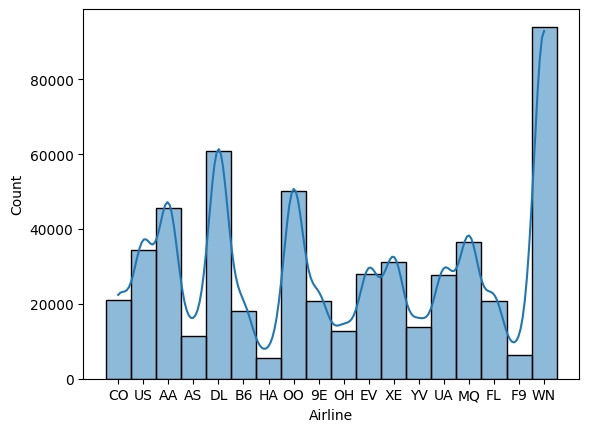

In [ ]:
sns.histplot(x='Airline', data=df, kde=True)

**<font size=4>Day of the Week-Delay</font>**
* Majority of airlines operations are on the 3-5th days
* Close chances of airlines being delayed except for the 6th day

<Axes: xlabel='Delay', ylabel='count'>

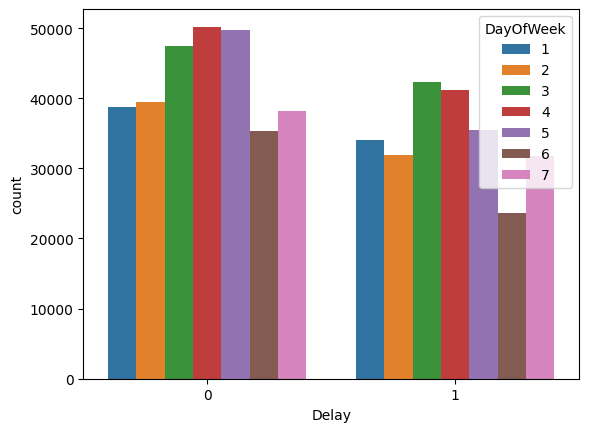

In [ ]:
sns.countplot(x='Delay', hue='DayOfWeek', data=df)

* **Percentages of each day that consists in being delayed**

In [ ]:
percentage_of_relations(y='DayOfWeek')

DayOfWeek,1,2,3,4,5,6,7
Delay,,,,,,,
0,13.0,13.2,15.9,16.8,16.6,11.8,12.8
1,14.2,13.3,17.6,17.2,14.8,9.8,13.2


<Axes: xlabel='DayOfWeek', ylabel='count'>

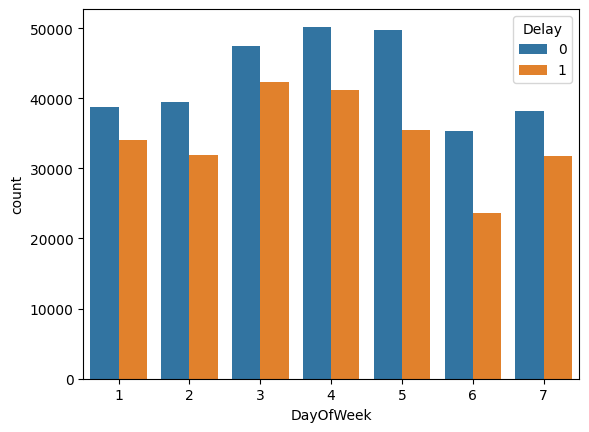

In [ ]:
sns.countplot(x='DayOfWeek', hue='Delay', data=df)

**<font size=4>Airlines-Day of the Week</font>**
* Equal distributions of each airline per day of the week

<Axes: xlabel='DayOfWeek', ylabel='count'>

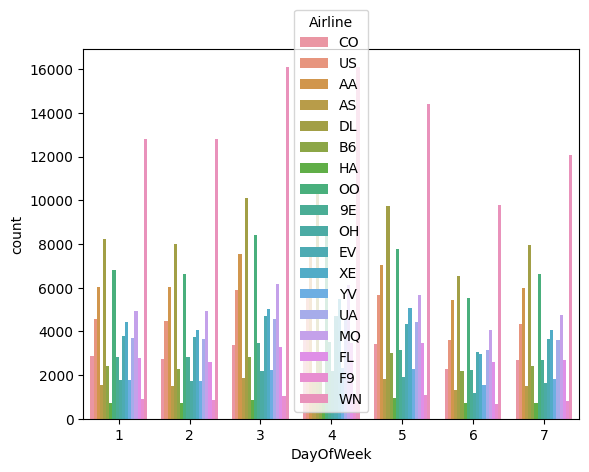

In [ ]:
sns.countplot(x='DayOfWeek', hue='Airline', data=df)

* **Percentages of each airline that consists in a day**

In [ ]:
percentage_of_relations(y='Airline', x='DayOfWeek')

Airline,9E,AA,AS,B6,CO,DL,EV,F9,FL,HA,MQ,OH,OO,UA,US,WN,XE,YV
DayOfWeek,,,,,,,,,,,,,,,,,,
1,3.9,8.3,2.1,3.3,4.0,11.3,5.2,1.2,3.8,1.0,6.8,2.4,9.3,5.1,6.3,17.6,6.1,2.4
2,3.9,8.5,2.1,3.2,3.9,11.2,5.2,1.2,3.7,1.0,6.9,2.5,9.3,5.1,6.3,18.0,5.7,2.5
3,3.9,8.4,2.1,3.1,3.8,11.3,5.2,1.2,3.6,1.0,6.9,2.4,9.4,5.1,6.6,18.0,5.6,2.5
4,3.9,8.3,2.1,3.3,4.0,11.3,5.2,1.2,3.8,1.0,6.7,2.4,9.3,5.0,6.5,17.6,6.0,2.5
5,3.7,8.3,2.1,3.5,4.0,11.5,5.1,1.3,4.0,1.1,6.6,2.2,9.1,5.2,6.7,16.9,5.9,2.7
6,3.8,9.2,2.3,3.7,3.9,11.1,5.2,1.2,4.4,1.2,6.9,2.0,9.4,5.3,6.1,16.6,5.0,2.6
7,3.8,8.5,2.1,3.5,3.8,11.4,5.2,1.1,3.8,1.0,6.8,2.3,9.5,5.1,6.2,17.3,5.8,2.6


**<font size=4>Airport-Delay</font>**
* To shorten the number of total airports to be plotted, I narrowed down the number of airports that Southwest Airlines has covered
* Going to and from, the value chances of both columns will be very similar to each other
* It seems that each airport  has a higher chance of being delayed compared to its vice versa
* Destination to airports McCarran International Airport(LAS) and Chicago Midway International Airport(MDW) occur the most

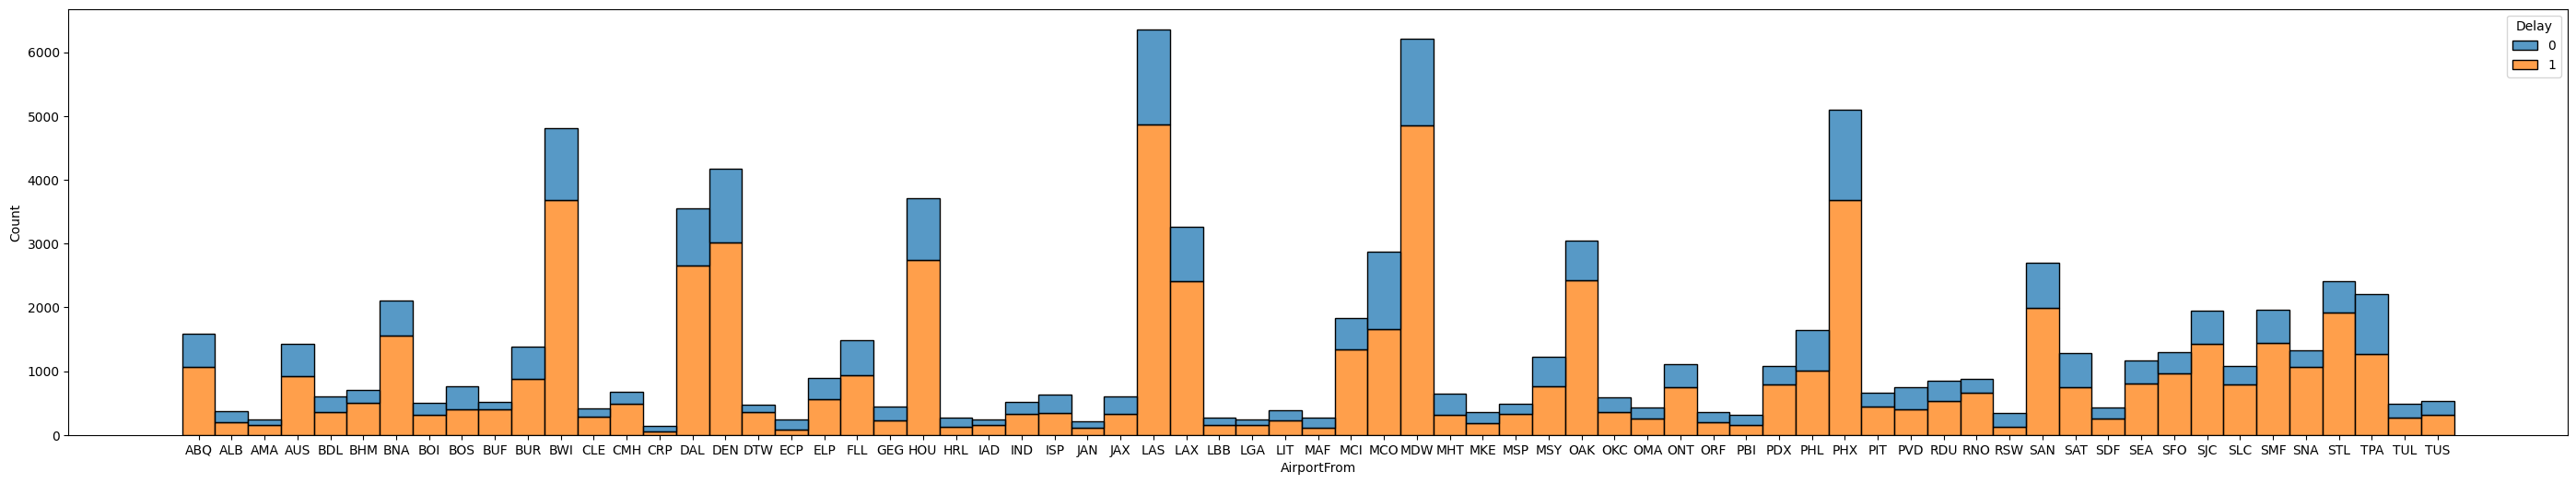

<Axes: xlabel='AirportTo', ylabel='Count'>

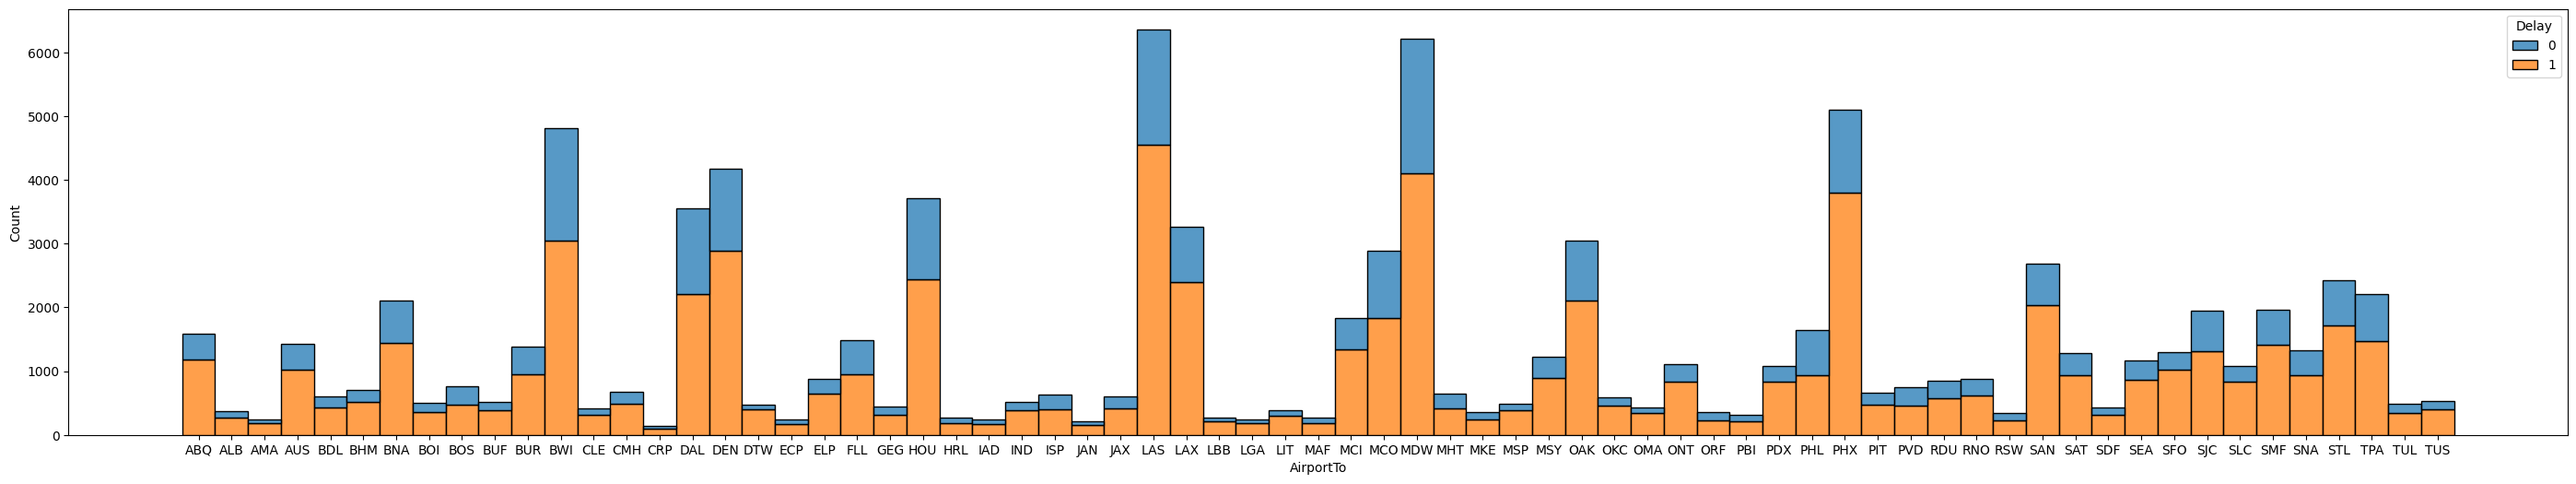

In [ ]:
airport_WN = pd.DataFrame(df[df['Airline']=='WN'])
plt.figure(figsize=(35,6))
sns.histplot(x='AirportFrom',data=airport_WN.sort_values('AirportFrom'), hue='Delay', multiple='stack')
plt.show()

plt.figure(figsize=(35,6))
sns.histplot(x='AirportTo',data=airport_WN.sort_values('AirportTo'), hue='Delay', multiple='stack')

**<font size=4>Flight Time-Delay</font>**
* Most Estimated flight times have a near equal chance of being delayed or not

<Axes: xlabel='Time', ylabel='Count'>

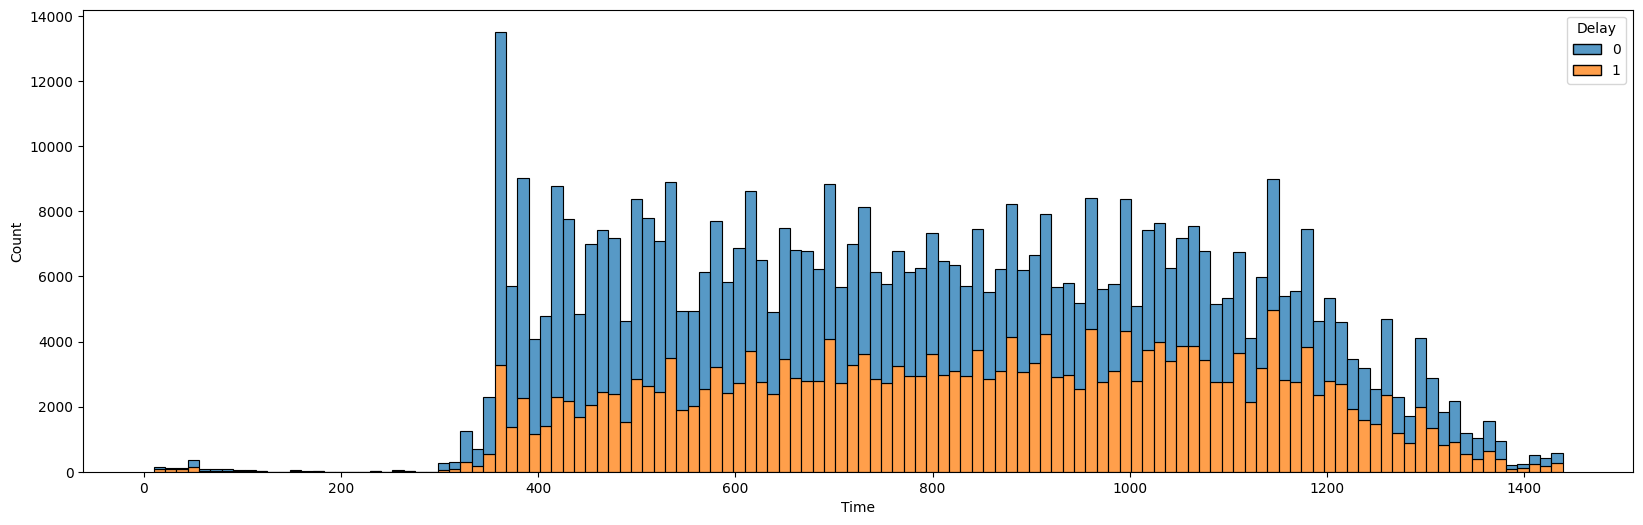

In [ ]:
plt.figure(figsize=(20,6))
sns.histplot(x='Time', hue='Delay', data=df, multiple='stack')

* **Percentages of day/non-delay chance per estimated time**

In [ ]:
percentage_of_relations(y='Time', bins=[0,200,400,600,800,1000,1200,1400], s=0, axis=1)

Time,"(0, 200]","(200, 400]","(400, 600]","(600, 800]","(800, 1000]","(1000, 1200]","(1200, 1400]"
Delay,,,,,,,
0,55.2,75.2,65.2,54.5,49.5,47.5,50.1
1,44.8,24.8,34.8,45.5,50.5,52.5,49.9


**<font size=4>Length-Time</font>**
* The farther the length the flight time increases, although not consistently

<Axes: xlabel='Length', ylabel='Time'>

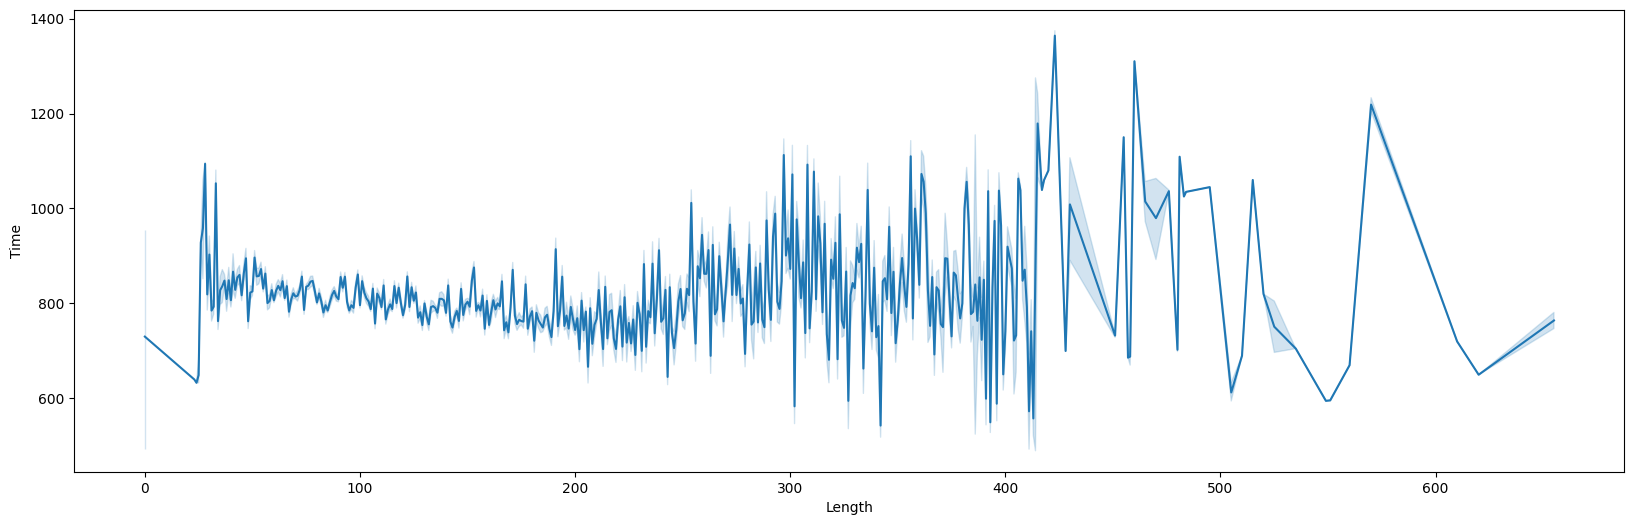

In [ ]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Length', y='Time', data=df)

**<font size=5>DATA ENGINEERING</font>**


* Split for categorical and numerical columns


* **Categorical Columns**:
   - One-hot-encoding(Airline)
   - Label Encoder(AirportFrom/To)


* **Numerical Columns(Length and Time):**
   - Convert minutes to hours

In [ ]:
get_stats(df)

,Column,Non-null counts,Null values,Number of unique,Unique values,Data type
0,id,539383,0,539383,"[1, 2, 3, 4, ...]",int64
1,Airline,539383,0,18,"[CO, US, AA, AS, ...]",object
2,Flight,539383,0,6585,"[269, 1558, 2400, 2466, ...]",int64
3,AirportFrom,539383,0,293,"[SFO, PHX, LAX, ANC, ...]",object
4,AirportTo,539383,0,293,"[IAH, CLT, DFW, SEA, ...]",object
5,DayOfWeek,539383,0,7,"[3, 4, 5, 6, ...]",int64
6,Time,539383,0,1131,"[15, 20, 30, 35, ...]",int64
7,Length,539383,0,426,"[205, 222, 165, 195, ...]",int64
8,Delay,539383,0,2,"[1, 0]",int64


**<font size=4>Categorical</font>**


In [ ]:
airline_dummies = pd.get_dummies(df['Airline'], dtype='int64', drop_first=True)
df.drop('Airline', axis=1, inplace=True)

df=pd.concat([df,airline_dummies], axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
airport_cols=['AirportTo','AirportFrom']

for airp_col in airport_cols:
    le = LabelEncoder()
    df.loc[:,airp_col] = le.fit_transform(df[airp_col])

df[airport_cols]=df[airport_cols].astype('int64')

**<font size=4>Numerical</font>**


In [ ]:
df['Length'] = df['Length']/60
df['Time'] = df['Time']/60

**<font size=4>Final Drops</font>**


In [ ]:
df.drop('id',axis=1, inplace=True)

**<font size=4>Pearson Correlation</font>**
* Positively correlated(0+)
* Negatively correlated(-0+)

<Axes: >

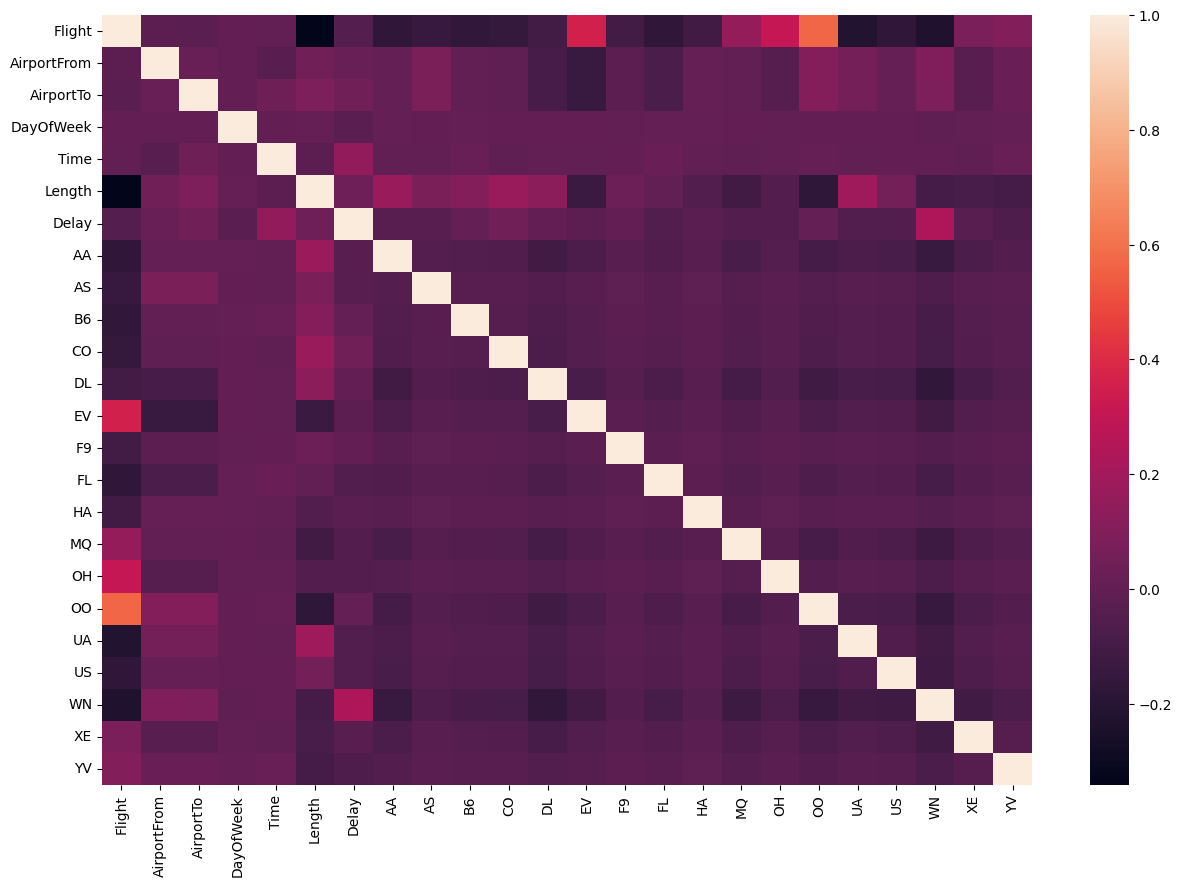

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())

**<font size=5>TRAIN AND TEST SPLIT</font>**
* 80-20 split

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X=df.drop('Delay', axis=1).values
y=df['Delay'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print('Train dimensions:',X_train.shape)
print('Validation test dimensions:',X_test.shape)

Train dimensions: (431506, 23)
Validation test dimensions: (107877, 23)


**<font size=5>MODEL SELECTION</font>**

**<font size=4>Models Used:</font>**
* Logistic Regression
* K Neighbors
* Decision Tree
* Random Tree
* Gaussian Naive
* Light GBM
* XG Boost
* Ada Boost

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

**<font size=4>Naive Bayes</font>**

In [ ]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
GNB_pred = GNB.predict(X_test)
print(classification_report(y_test,GNB_pred.round()))
print(confusion_matrix(y_test,GNB_pred.round()))
print(f'\nAccuracy:{accuracy_score(y_test,GNB_pred.round())}')

              precision    recall  f1-score   support

           0       0.66      0.52      0.58     59733
           1       0.53      0.68      0.59     48144

    accuracy                           0.59    107877
   macro avg       0.60      0.60      0.59    107877
weighted avg       0.60      0.59      0.59    107877

[[30832 28901]
 [15645 32499]]

Accuracy:0.587066751948979


**<font size=4>Logistic Regression</font>**

In [ ]:
lgre = LogisticRegression(max_iter=650)
lgre.fit(X_train,y_train)
lgre_pred = lgre.predict(X_test)
print(classification_report(y_test,lgre_pred.round()))
print(confusion_matrix(y_test,lgre_pred.round()))
print(f'\nAccuracy:{accuracy_score(y_test,lgre_pred.round())}')

              precision    recall  f1-score   support

           0       0.63      0.78      0.70     59733
           1       0.62      0.44      0.51     48144

    accuracy                           0.63    107877
   macro avg       0.63      0.61      0.61    107877
weighted avg       0.63      0.63      0.62    107877

[[46782 12951]
 [26982 21162]]

Accuracy:0.6298284156956534


**<font size=4>Random Forest</font>**

In [ ]:
rand_class = RandomForestClassifier(max_depth=15)
rand_class.fit(X_train,y_train)
rand_class_pred = rand_class.predict(X_test)
print(classification_report(y_test,rand_class_pred.round()))
print(confusion_matrix(y_test,rand_class_pred.round()))
print(f'\nAccuracy:{accuracy_score(y_test,rand_class_pred.round())}')

              precision    recall  f1-score   support

           0       0.65      0.84      0.73     59733
           1       0.69      0.43      0.53     48144

    accuracy                           0.66    107877
   macro avg       0.67      0.64      0.63    107877
weighted avg       0.67      0.66      0.64    107877

[[50211  9522]
 [27302 20842]]

Accuracy:0.6586482753506309


**<font size=4>Decision Tree</font>**

In [ ]:
dtree = DecisionTreeClassifier(max_depth=7)
dtree.fit(X_train,y_train)
dtree_class_pred = dtree.predict(X_test)
print(classification_report(y_test,dtree_class_pred.round()))
print(confusion_matrix(y_test,dtree_class_pred.round()))
print(f'\nAccuracy:{accuracy_score(y_test,dtree_class_pred.round())}')

              precision    recall  f1-score   support

           0       0.63      0.86      0.73     59733
           1       0.68      0.36      0.47     48144

    accuracy                           0.64    107877
   macro avg       0.65      0.61      0.60    107877
weighted avg       0.65      0.64      0.61    107877

[[51490  8243]
 [30659 17485]]

Accuracy:0.6393855965590441


**<font size=4>K Neighbors</font>**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
knn_class_pred = knn.predict(X_test)
print(classification_report(y_test,knn_class_pred.round()))
print(confusion_matrix(y_test,knn_class_pred.round()))
print(f'\nAccuracy:{accuracy_score(y_test,knn_class_pred.round())}')

              precision    recall  f1-score   support

           0       0.66      0.74      0.70     59733
           1       0.62      0.53      0.57     48144

    accuracy                           0.64    107877
   macro avg       0.64      0.63      0.63    107877
weighted avg       0.64      0.64      0.64    107877

[[44050 15683]
 [22703 25441]]

Accuracy:0.6441688218990146


**<font size=4>AdaBoost</font>**

In [ ]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
ada_class_pred = ada.predict(X_test)
print(classification_report(y_test,ada_class_pred.round()))
print(confusion_matrix(y_test,ada_class_pred.round()))
print(f'\nAccuracy:{accuracy_score(y_test,ada_class_pred.round())}')

              precision    recall  f1-score   support

           0       0.65      0.78      0.71     59733
           1       0.63      0.47      0.54     48144

    accuracy                           0.64    107877
   macro avg       0.64      0.62      0.62    107877
weighted avg       0.64      0.64      0.63    107877

[[46427 13306]
 [25463 22681]]

Accuracy:0.6406184821602381


**<font size=4>XGBoost</font>**

In [ ]:
xg = XGBClassifier()
xg.fit(X_train,y_train)
xg_class_pred = xg.predict(X_test)
print(classification_report(y_test,xg_class_pred.round()))
print(confusion_matrix(y_test,xg_class_pred.round()))
print(f'\nAccuracy:{accuracy_score(y_test,xg_class_pred.round())}')

              precision    recall  f1-score   support

           0       0.66      0.80      0.73     59733
           1       0.67      0.50      0.57     48144

    accuracy                           0.66    107877
   macro avg       0.67      0.65      0.65    107877
weighted avg       0.67      0.66      0.66    107877

[[47744 11989]
 [24164 23980]]

Accuracy:0.6648683222559025


**<font size=4>Light GBM</font>**

In [ ]:
lgb = LGBMClassifier()
lgb.fit(X_train,y_train)
lgb_class_pred = lgb.predict(X_test)
print(classification_report(y_test,lgb_class_pred.round()))
print(confusion_matrix(y_test,lgb_class_pred.round()))
print(f'\nAccuracy:{accuracy_score(y_test,lgb_class_pred.round())}')

              precision    recall  f1-score   support

           0       0.65      0.82      0.73     59733
           1       0.67      0.46      0.54     48144

    accuracy                           0.66    107877
   macro avg       0.66      0.64      0.64    107877
weighted avg       0.66      0.66      0.64    107877

[[48876 10857]
 [26076 22068]]

Accuracy:0.6576378653466448
